# Convolutional Neural Network on vegetable prediction
By: Shawn Lim Jun Jie (2239745), class DAAA/2B/01

In this notebook, I will be performing an image recognition task to predict the vegetable types based on the images I have been provided. I will be using Convolutional Neural Network (CNN) to perform the task.

### References:
- Buda, M., Maki, A. and Mazurowski, M.A. (2018) A systematic study of the class imbalance problem in Convolutional Neural Networks, arXiv.org. Available at: https://arxiv.org/abs/1710.05381 (Accessed: 11 November 2023).

- Shorten, C. and Khoshgoftaar, T.M. (2019) A survey on image data augmentation for Deep Learning - Journal of Big Data, SpringerOpen. Available at: https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0 (Accessed: 12 November 2023).

- Inoue, H. (2018) Data augmentation by pairing samples for Images Classification, arXiv.org. Available at: https://arxiv.org/abs/1801.02929 (Accessed: 12 November 2023).

- Brownlee, J. (2020) How to evaluate pixel scaling methods for image classification with cnns, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/how-to-evaluate-pixel-scaling-methods-for-image-classification/ (Accessed: 12 November 2023).

- Ruizendaal, R. (2021) Deep learning #3: More on CNNS &amp; handling overfitting, Medium. Available at: https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d (Accessed: 17 November 2023).

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.utils import img_to_array
import gc
import tensorflow as tf
import seaborn as sns

# as I am running arch linux (now moved to google colab), Pillow is already given by default. Refer to documentation if you need to install manually: https://pillow.readthedocs.io/en/stable/installation.html
from PIL import Image, ImageOps
tf.config.list_physical_devices('GPU')

2023-11-26 00:42:47.623112: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]

In [2]:
# ignore this if you are not using google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# do not run this command unless you are using google colab with the data stored in google drive
!unzip gdrive/MyDrive/"dataset_part_A".zip -d dataset_part_A

Streaming output truncated to the last 5000 lines.
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0056.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0057.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0058.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0059.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0060.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0061.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0062.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0063.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0064.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0070.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0071.jpg  
  inflating: dataset_part_A/Dataset for CA1 part A/train/Pumpkin/0072.jpg  
  inflating: dataset_part_A/Dataset f

## Setting up
Define directories where the images are located.
Please change the directories if they are located elsewhere.

In [25]:
# NOTE: PLEASE SET THE PATH FOR YOUR TRAIN, TEST, AND VALIDATION FOLDERS
# train_dir = 'dataset_part_A/Dataset for CA1 part A/train'
# test_dir = 'dataset_part_A/Dataset for CA1 part A/test'
# val_dir = 'dataset_part_A/Dataset for CA1 part A/validation'

train_dir = 'Dataset for CA1 part A/train'
test_dir = 'Dataset for CA1 part A/test'
val_dir = 'Dataset for CA1 part A/validation'

## EDA
A quick EDA on the directory of the dataset, check if there is any imbalance and any missing classes whatsoever.

In [ ]:
# checking the number of classes under the train, test, and validation directories
print(f'Number of classes in train: {len(os.listdir(train_dir))}')
print(f'Number of classes in test: {len(os.listdir(test_dir))}')
print(f'Number of classes in validation: {len(os.listdir(val_dir))}')

Number of classes in train: 15
Number of classes in test: 15
Number of classes in validation: 15


In [ ]:
# check the number of samples for each vegetable type in train, test, and validation
def checkSamples(directory):
    count = {veg : len(os.listdir(f'{directory}/{veg}')) for veg in os.listdir(directory)}
    print(f'Under {directory}:\n----------------------------\n' + '\n'.join([f'{veg}: {count[veg]}' for veg in count.keys()]), end='\n----------------------------\n\n')

checkSamples(train_dir)
checkSamples(test_dir)
checkSamples(val_dir)

Under dataset_part_A/Dataset for CA1 part A/train:
----------------------------
Cucumber: 812
Pumpkin: 814
Potato: 377
Radish: 248
Bottle_Gourd: 441
Broccoli: 750
Papaya: 566
Cabbage: 503
Bitter_Gourd: 720
Bean: 780
Capsicum: 351
Carrot: 256
Tomato: 955
Cauliflower: 587
Brinjal: 868
----------------------------

Under dataset_part_A/Dataset for CA1 part A/test:
----------------------------
Cucumber: 200
Pumpkin: 200
Potato: 200
Radish: 200
Bottle_Gourd: 200
Broccoli: 200
Papaya: 200
Cabbage: 200
Bitter_Gourd: 200
Bean: 200
Capsicum: 200
Carrot: 200
Tomato: 200
Cauliflower: 200
Brinjal: 200
----------------------------

Under dataset_part_A/Dataset for CA1 part A/validation:
----------------------------
Cucumber: 200
Pumpkin: 200
Potato: 200
Radish: 200
Bottle_Gourd: 200
Broccoli: 200
Papaya: 200
Cabbage: 200
Bitter_Gourd: 200
Bean: 200
Capsicum: 200
Carrot: 200
Tomato: 200
Cauliflower: 200
Brinjal: 200
----------------------------



Unfortunately, there seems to be an imbalance of training dataset, where radish has 248 images while tomato has 955 images.

## Image preprocessing
In this stage, I need to process the image to meet the requirement of the brief. I just need to greyscale the images, downsize to two different dimensions, then save them onto a new directory.

I will be using Pillow to get the image and transform. It takes just a few lines of code to do all the necessary steps, like opening and transforming them, no need to attempt to reinvent the wheel.

RGB
(224, 224)


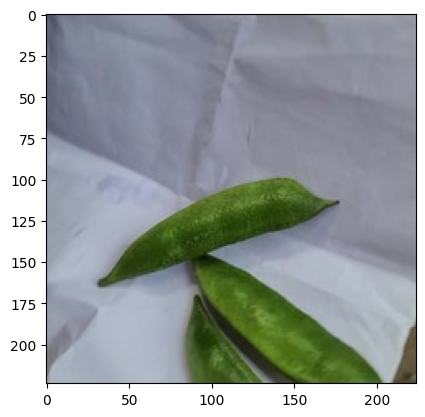

3537

In [ ]:
# sampling an image to test that the library works
im = Image.open(train_dir + '/Bean/0028.jpg')
print(im.mode)
print(im.size)
plt.imshow(im)
plt.show()

del im
gc.collect()

I create a function to retrieve and immediately transform the image to grayscale and their respective sizing, massively reducing any redundancy. I will also do the pixel scaling at this stage to scale every single image pixel value from ranging 0 to 255 into 0 to 1. This is so that "the network uses a weighted sum of inputs, and for the network to both be stable and train effectively, weights should be kept small" (Brownlee, J. (2020)).

In [46]:
# create a function which will perform the required transformation (greyscale and downsizing to two different sizes)
# it will also scale the pixel values to range from 0 to 1
# input the directory of all the vegetable images and the size of the output images
# it will also return a dictionary of images
def getAndTransform(directory, inputSize):
    dir_list = os.listdir(directory)
    # images = []
    images = {}
    veg_names = []

    # knowing that each pixel can range from 0 to 255, I might as well divide all pixel values by 255 as a way to scale the pixels values to range from 0 to 1
    pixelScaler = np.vectorize(lambda x: x / 255)

    # for each vegetable image directory in the selected parent directory...
    for veg_dir in dir_list:
        # a lambda function to perform greyscaling and downsizing on the image
        transformer = lambda img: img.convert('L').resize((inputSize, inputSize))
        # apply the map function to map the image into the transformer and save the whole thing into a dictionary under the veg_dir key
        images[veg_dir] = list(map(transformer, [Image.open(f'{directory}/{veg_dir}/{img_path}') for img_path in os.listdir(f'{directory}/{veg_dir}')]))

    img_list = []
    for veg_name, imgs in images.items():
        for img in imgs:
            img_list.append(pixelScaler(np.asarray(img, dtype=np.float16)))
            veg_names.append(veg_name)

    img_array = np.array(img_list).reshape(len(img_list), inputSize, inputSize, 1)

    return (np.array(veg_names), img_array)

I keep each respective train, test, and validation data and the respective image sizing separately, so that I can easily access each of them later on.

In [47]:
train_label_31, train_data_31 = getAndTransform(train_dir, 31)
test_label_31, test_data_31 = getAndTransform(test_dir, 31)
val_label_31, val_data_31 = getAndTransform(val_dir, 31)
train_label_128, train_data_128 = getAndTransform(train_dir, 128)
test_label_128, test_data_128 = getAndTransform(test_dir, 128)
val_label_128, val_data_128 = getAndTransform(val_dir, 128)

I have to also manually build my own one hot encoder since I already have a separate array of labels

In [49]:
def oneHotEncode(labelArray):
    uniqueLabels = np.unique(labelArray)
    encodedData = np.zeros((len(labelArray), len(uniqueLabels)))
    for i, label in enumerate(labelArray):
        encodedData[i][np.where(uniqueLabels == label)] = 1
    return encodedData

In [50]:
train_label_128_encoded = oneHotEncode(train_label_128)
test_label_128_encoded = oneHotEncode(test_label_128)
val_label_128_encoded = oneHotEncode(val_label_128)
train_label_31_encoded = oneHotEncode(train_label_31)
test_label_31_encoded = oneHotEncode(test_label_31)
val_label_31_encoded = oneHotEncode(val_label_31)

In [5]:
# lastly, I would have the functions to plot the training and validation accuracy and loss curves
def plot_accuracy(history, title):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plot_loss(history, title):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

## Baseline CNN models with Keras
To start off, I will try and perform CNN without any data augmentation and any research on how to design a CNN architecture. This is so that I can establish a baseline to see how it perform with the base dataset that has not been transformed or augmented in any way besides the required transformation as specified in the assignment brief and without any prior understanding of how the CNN architecture should be properly made. The CNN architecture will be built randomly based on some trial and error. I will research more on CNN architecture as I try to improve the accuracy later on. Luckily, since our test and validation data are perfectly balance, I can simply look at the accuracy score and not worried that the model blindly predict one class all the time and still obtain a high accuracy.

In [ ]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential

In [ ]:
def baseline_model_128():
    model = Sequential()

    model.add(Conv2D(15, kernel_size=5, input_shape=(128, 128, 1), activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.2))
    model.add(Conv2D(25, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.2))
    model.add(Conv2D(30, kernel_size=4, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.2))
    model.add(Conv2D(40, kernel_size=2, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(40, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(15, activation='softmax'))

    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    return model

In [ ]:
model_128 = baseline_model_128()
model_128.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 15)      390       
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 15)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 62, 62, 15)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 25)        9400      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 25)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 25)        0

In [ ]:
history = model_128.fit(train_data_128, train_label_128_encoded, batch_size=128, epochs=50, validation_data=(val_data_128, val_label_128_encoded))
model_128.evaluate(test_data_128, test_label_128_encoded, batch_size=64)

Epoch 1/50
71/71 [==============================] - 18s 67ms/step - loss: 2.5967 - accuracy: 0.1032 - val_loss: 2.5876 - val_accuracy: 0.1227
Epoch 2/50
71/71 [==============================] - 3s 44ms/step - loss: 2.2515 - accuracy: 0.2380 - val_loss: 2.1093 - val_accuracy: 0.3110
Epoch 3/50
71/71 [==============================] - 3s 45ms/step - loss: 1.8505 - accuracy: 0.3962 - val_loss: 1.7811 - val_accuracy: 0.4107
Epoch 4/50
71/71 [==============================] - 3s 41ms/step - loss: 1.5692 - accuracy: 0.4862 - val_loss: 1.5670 - val_accuracy: 0.5007
Epoch 5/50
71/71 [==============================] - 3s 42ms/step - loss: 1.4302 - accuracy: 0.5329 - val_loss: 1.4637 - val_accuracy: 0.5340
Epoch 6/50
71/71 [==============================] - 3s 41ms/step - loss: 1.2347 - accuracy: 0.6032 - val_loss: 1.2067 - val_accuracy: 0.6213
Epoch 7/50
71/71 [==============================] - 3s 47ms/step - loss: 1.1600 - accuracy: 0.6242 - val_loss: 1.2017 - val_accuracy: 0.6150
Epoch 8/50
7

[0.49078264832496643, 0.8669999837875366]

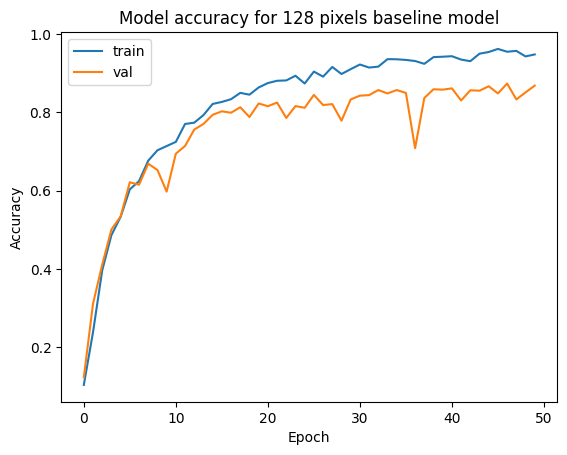

In [ ]:
plot_accuracy(history, 'Model accuracy for 128 pixels baseline model')

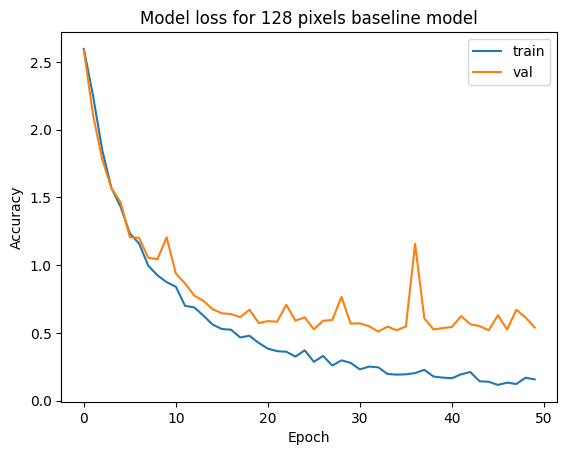

In [ ]:
plot_loss(history, 'Model loss for 128 pixels baseline model')

In [ ]:
# as I only have limited amount of memory on google colab, I need to free up some memory space or else I will get disconnected
del model_128, history
gc.collect()

5188

For the 128x128 pixels, this random model I built can get around 85% accuracy on the test dataset without any augmentation, and that's also despite the fact that the training data is also imbalance. Also, it seems to take a lot of epochs to reach the plateau level, before the model start overfitting. I will also test out the 31x31 pixels without any augmentation or researching on well-known CNN architecture to also see how it perform.

In [ ]:
def baseline_model_31():
    model = Sequential()

    model.add(Conv2D(20, kernel_size=4, input_shape=(31, 31, 1), activation='relu', padding='same'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.3))
    model.add(Conv2D(30, kernel_size=3, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Conv2D(40, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(15, activation='softmax'))

    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    return model

In [ ]:
model_31 = baseline_model_31()
model_31.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 31, 31, 20)        340       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 20)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 20)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 30)        5430      
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 30)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 40)        10840     
                                                      

In [ ]:
history = model_31.fit(train_data_31, train_label_31_encoded, batch_size=96, epochs=50, validation_data=(val_data_31, val_label_31_encoded))
model_31.evaluate(test_data_31, test_label_31_encoded, batch_size=96)

Epoch 1/50
95/95 [==============================] - 4s 14ms/step - loss: 2.5511 - accuracy: 0.1618 - val_loss: 2.4747 - val_accuracy: 0.1887
Epoch 2/50
95/95 [==============================] - 1s 7ms/step - loss: 2.1132 - accuracy: 0.3538 - val_loss: 2.4631 - val_accuracy: 0.2960
Epoch 3/50
95/95 [==============================] - 1s 8ms/step - loss: 1.8495 - accuracy: 0.4397 - val_loss: 1.7884 - val_accuracy: 0.4353
Epoch 4/50
95/95 [==============================] - 1s 8ms/step - loss: 1.6119 - accuracy: 0.5023 - val_loss: 1.5912 - val_accuracy: 0.5000
Epoch 5/50
95/95 [==============================] - 1s 6ms/step - loss: 1.4284 - accuracy: 0.5635 - val_loss: 1.6292 - val_accuracy: 0.4770
Epoch 6/50
95/95 [==============================] - 1s 6ms/step - loss: 1.3215 - accuracy: 0.5928 - val_loss: 1.4883 - val_accuracy: 0.5423
Epoch 7/50
95/95 [==============================] - 1s 6ms/step - loss: 1.2365 - accuracy: 0.6208 - val_loss: 1.3122 - val_accuracy: 0.5807
Epoch 8/50
95/95 [=

[0.7351508736610413, 0.8376666903495789]

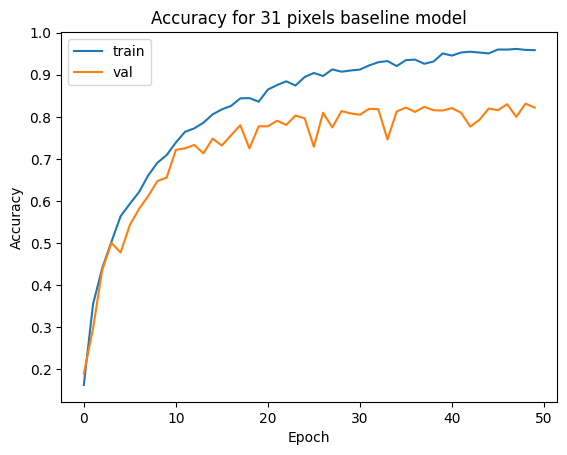

In [ ]:
plot_accuracy(history, 'Accuracy for 31 pixels baseline model')

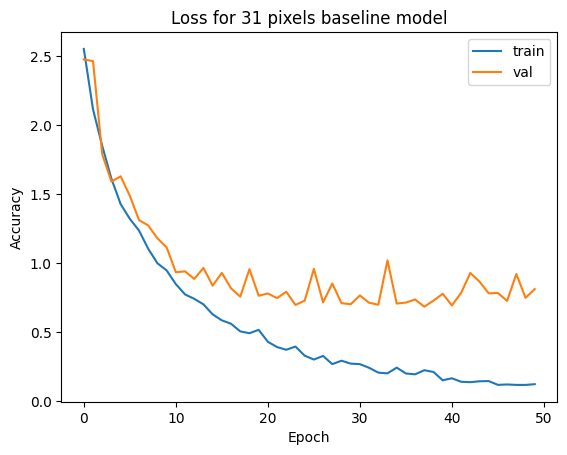

In [ ]:
plot_loss(history, 'Loss for 31 pixels baseline model')

In [ ]:
del model_31, history
gc.collect()

12105

With the 31x31 pixels, the baseline model can get around 80% accuracy, with randomly built layers and no augmentations to the data, but it started overfitting at around 15 epochs and plateau at just around 80% validation accuracy. So then I will start figuring out what and how can I augment the data.

## Data augmentation

Now my goal now is to obviously improve the accuracy of the models for both the 128 and 31 pixel models, but I also want to reduce the amount of epochs and training time -- basically improving the efficiency on the models, and also trying to fix the overfitting problem as well.

Firstly, we need to deal with the class imbalance on the training data. Undersampling is out of the question since the class with the smallest number of images has only over 200 images, which might not be sufficient. Hence, we can only try oversampling or methods that allows us to tweak our model to "bias" towards more the minority.

Imbalance ratio: 3.850806451612903


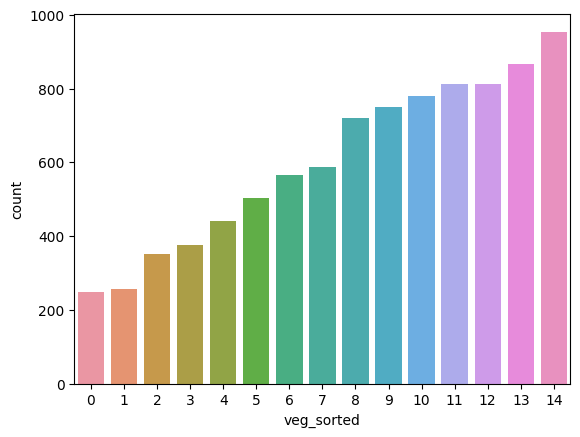

In [ ]:
count = [len(os.listdir(f'{train_dir}/{veg}')) for veg in os.listdir(train_dir)]
count.sort()
count_df = pd.DataFrame({'veg_sorted' : [i for i in range(len(count))], 'count' : count})
print(f'Imbalance ratio: {max(count) / min(count)}')
sns.barplot(data=count_df, x='veg_sorted', y='count')
plt.show()

As we can see, our training data appears to be more of a "linear imbalance", where the difference between each classes, sorted by the number of examples, appear to be around a constant value. According to the paper (Buda, M., Maki, A. and Mazurowski, M.A. (2018)) on calculating the imbalance ratio for linearly imbalance data, the imbalance ratio for this dataset appears to be 3.85. Also, by looking at the results on the paper I mentioned, it appears that oversampling seem to improve the result, but not drastic, while undersampling actually performs worse than a baseline model.

Alternatively, I can also try to add a class weight. I am going to experiement and see if setting initial weights on the baseline models would help to improve the model.

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',classes = np.unique(train_label_128), y = train_label_128)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.7716239316239316,
 1: 0.835925925925926,
 2: 1.3647770219198792,
 3: 0.693394777265745,
 4: 0.8024888888888889,
 5: 1.1965540092776674,
 6: 1.7147198480531813,
 7: 2.3510416666666667,
 8: 1.0253265190232823,
 9: 0.7412151067323481,
 10: 1.0633686690223794,
 11: 1.5964633068081344,
 12: 0.7393939393939394,
 13: 2.4268817204301074,
 14: 0.6302268760907505}

In [ ]:
model_128_w_class_weight = baseline_model_128()
history = model_128_w_class_weight.fit(train_data_128, train_label_128_encoded, batch_size=128, epochs=50, validation_data=(val_data_128, val_label_128_encoded), class_weight=class_weights)
model_128_w_class_weight.evaluate(test_data_128, test_label_128_encoded, batch_size=64)

Epoch 1/50
71/71 [==============================] - 6s 59ms/step - loss: 2.6412 - accuracy: 0.1017 - val_loss: 2.4597 - val_accuracy: 0.1950
Epoch 2/50
71/71 [==============================] - 4s 62ms/step - loss: 2.2797 - accuracy: 0.2571 - val_loss: 2.1682 - val_accuracy: 0.3337
Epoch 3/50
71/71 [==============================] - 4s 53ms/step - loss: 1.9235 - accuracy: 0.3865 - val_loss: 1.8671 - val_accuracy: 0.4047
Epoch 4/50
71/71 [==============================] - 4s 50ms/step - loss: 1.6596 - accuracy: 0.4621 - val_loss: 1.5506 - val_accuracy: 0.5000
Epoch 5/50
71/71 [==============================] - 4s 61ms/step - loss: 1.4983 - accuracy: 0.5056 - val_loss: 1.3879 - val_accuracy: 0.5487
Epoch 6/50
71/71 [==============================] - 5s 66ms/step - loss: 1.3554 - accuracy: 0.5507 - val_loss: 1.4024 - val_accuracy: 0.5473
Epoch 7/50
71/71 [==============================] - 3s 48ms/step - loss: 1.2019 - accuracy: 0.5984 - val_loss: 1.2811 - val_accuracy: 0.5927
Epoch 8/50
71

[0.6015493869781494, 0.846666693687439]

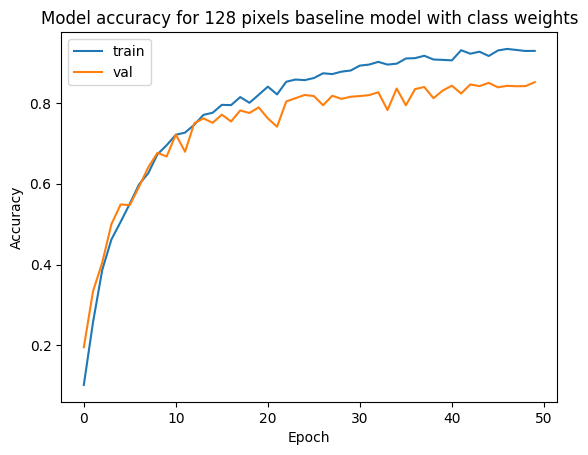

In [ ]:
plot_accuracy(history, 'Model accuracy for 128 pixels baseline model with class weights')

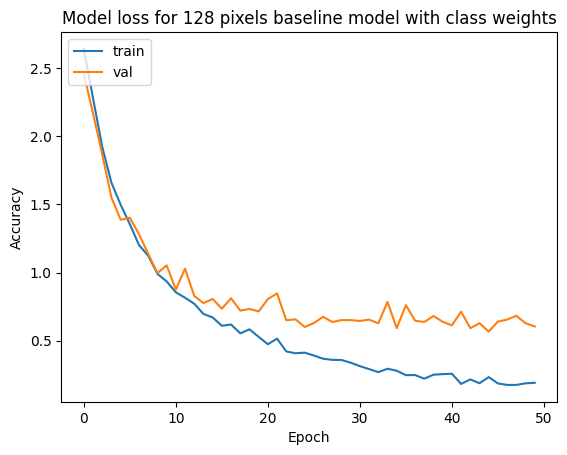

In [ ]:
plot_loss(history, 'Model loss for 128 pixels baseline model with class weights')

Not much of an improvement overall, still overfits as well.

In [ ]:
model_31_w_class_weight = baseline_model_31()
history = model_31_w_class_weight.fit(train_data_31, train_label_31_encoded, batch_size=96, epochs=50, validation_data=(val_data_31, val_label_31_encoded), class_weight=class_weights)
model_31_w_class_weight.evaluate(test_data_31, test_label_31_encoded, batch_size=96)

Epoch 1/50
95/95 [==============================] - 2s 9ms/step - loss: 2.5973 - accuracy: 0.1414 - val_loss: 2.3768 - val_accuracy: 0.2350
Epoch 2/50
95/95 [==============================] - 1s 7ms/step - loss: 2.2178 - accuracy: 0.3234 - val_loss: 2.0170 - val_accuracy: 0.4077
Epoch 3/50
95/95 [==============================] - 1s 6ms/step - loss: 1.9323 - accuracy: 0.4241 - val_loss: 1.7615 - val_accuracy: 0.4780
Epoch 4/50
95/95 [==============================] - 1s 6ms/step - loss: 1.6741 - accuracy: 0.4880 - val_loss: 1.8438 - val_accuracy: 0.4277
Epoch 5/50
95/95 [==============================] - 1s 7ms/step - loss: 1.5233 - accuracy: 0.5294 - val_loss: 1.4156 - val_accuracy: 0.5697
Epoch 6/50
95/95 [==============================] - 1s 12ms/step - loss: 1.3517 - accuracy: 0.5813 - val_loss: 1.4937 - val_accuracy: 0.5117
Epoch 7/50
95/95 [==============================] - 1s 15ms/step - loss: 1.2534 - accuracy: 0.6153 - val_loss: 1.2902 - val_accuracy: 0.6143
Epoch 8/50
95/95 [

[0.8809493780136108, 0.8003333210945129]

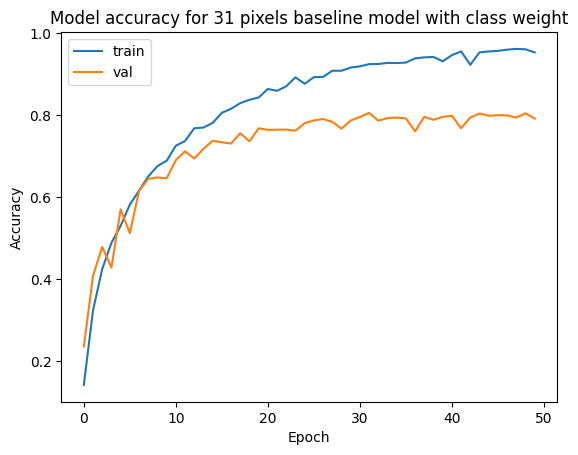

In [ ]:
plot_accuracy(history, 'Model accuracy for 31 pixels baseline model with class weight')

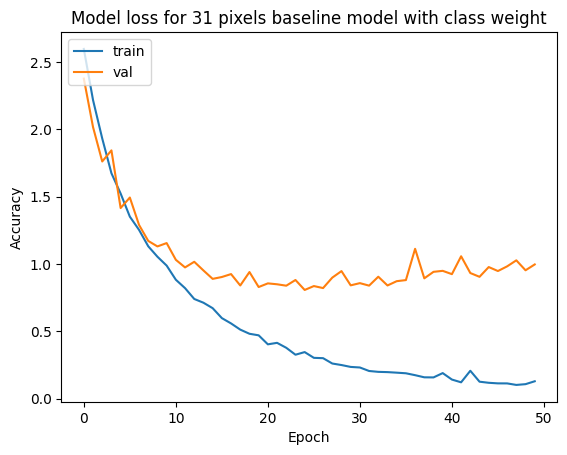

In [ ]:
plot_loss(history, 'Model loss for 31 pixels baseline model with class weight')

In [ ]:
del history, model_128_w_class_weight, model_31_w_class_weight
gc.collect()

Again, with the class weight but for the 31 pixels model, there's not much improvement overall. The validation and subsequently the test accuracy is still around 80%, and I can see the overfitting occuring as well.
So it seems like setting the initial class weights did barely any improvement if at all, so I might as well abandon this idea and move on. The only way now is to oversample the smaller classes.

One method of oversampling is to duplicate the images many times. However, this can easily led to overfit as the model would just learn the same thing again and memorise the training features. So what I can do is duplicate and augment the images. Unfortunately, I will not be able to perform some augmentations, such as resizing, due to the assignment specification constraint. Here are the potential augmentations I can perform (Shorten, C. and Khoshgoftaar, T.M. (2019)):
1. Flipping or mirroring. Since we are not dealing with how the objects should be oriented (for example, digit recognition in MNIST), we can implement this idea to our augmentation. This augmentation has been proven to work on datasets such as CIFAR-10 and ImageNet.
2. Translation. By simply randomly moving the images around, we can avoid positional bias, although I am not sure if all the objects are positioned in the center as I am not insane enough to check through all the images. We can fill up the gap with gaussian noise. However, I am not entirely sure if this will be similar to simply duplicating because the relative position among each items in the pixel remains the same, is just some pixels will be gone, while new random gaussian pixels were introduced.
3. Image mixing, or SamplePairing. Surprisingly, by taking two different images, and average the pixel up, not only will it turn into a mess, but also somehow improves the model performance. (Inoue, H. (2018))

For now, I will try and perform a mix of flipping and mirroring on the duplicated images as a way to oversample and augment new data. Then I will also have image mixing as another way to oversample. I will test both out and see which will perform better. And maybe, I can do flipping or mirroring on some duplicated images, and have some being mixed with another images as another way to augment, if I need to attain a balance of both ways.

In [6]:
# rebuild the get and transform function such that it will also do the data augmentation on flipping and mirroring
def getAndAugment1(directory, inputSize):
    dir_list = os.listdir(directory)
    images = {}
    veg_names = []

    pixelScaler = np.vectorize(lambda x: x / 255)

    for veg_dir in dir_list:
        # a lambda function to perform greyscaling and downsizing on the image
        transformer = lambda img: img.convert('L').resize((inputSize, inputSize))
        # apply the map function to map the image into the transformer and save the whole thing into a dictionary under the veg_dir key
        images[veg_dir] = list(map(transformer, [Image.open(f'{directory}/{veg_dir}/{img_path}') for img_path in os.listdir(f'{directory}/{veg_dir}')]))

        # in addition to the original images, the loop below will duplicate the transformed images and augment them, until the total number of images is equal to the class with the most, which is 955
        # if the current iteration is the one with the max class length, skip
        numOfImg = len(images[veg_dir])
        if numOfImg == 1500:
            continue

        new_img_list = []
        ratio = (1500 / numOfImg) - 1            # the whole number of this division will be the number of times the original image list will be copied
        mode = 0                                # this mode will indicate which function to augment, this is so that there will be no two of the same images will have the same augmentation
        # since the imbalance ratio is 3.85, this means the smallest class will just nice be enough to perform 3 different types of augmentation so that there will be no two images that are exactly the same
        funcs = {
            0 : ImageOps.flip,                                    # the first list of duplicates will be a flip
            1 : ImageOps.mirror,                                  # the second list of duplicates will be a mirror, if more duplicates are needed
            2 : lambda img : ImageOps.flip(ImageOps.mirror(img))  # the third list of duplicates will be a combination of both, if more duplicates are needed
        }
        while ratio >= 1:                       # each while loop implies that the entire original list will be duplicated, and augmented according to which mode it is on
            new_img_list += list(map(funcs[mode], images[veg_dir].copy()))
            ratio -= 1
            mode = 0 if mode == 2 else mode + 1
        else:                                   # under this else will basically be when a portion of the original list will be duplicated
            new_img_list += list(map(funcs[mode], images[veg_dir][:round(numOfImg * ratio)]))

        images[veg_dir] += new_img_list

    img_list = []
    for veg_name, imgs in images.items():
        for img in imgs:
            img_list.append(pixelScaler(np.asarray(img, dtype=np.float16)))
            veg_names.append(veg_name)

    img_array = np.array(img_list).reshape(len(img_list), inputSize, inputSize, 1)

    return (np.array(veg_names), img_array)

In [ ]:
# to free up memory, I will remove the training data from earlier
del train_label_31, train_data_31, train_label_128, train_data_128, train_label_128_encoded, train_label_31_encoded
gc.collect()

train_label_31, train_data_31 = getAndAugment1(train_dir, 31)
train_label_128, train_data_128 = getAndAugment1(train_dir, 128)

train_label_31_encoded = oneHotEncode(train_label_31)
train_label_128_encoded = oneHotEncode(train_label_128)

Now that I have prepared the training data that are oversampled with augmentation, I am going to attempt to put that in the baseline model from above and see if the model benefits from that oversampled data.

In [ ]:
model_128_augmented_1 = baseline_model_128()
history = model_128_augmented_1.fit(train_data_128, train_label_128_encoded, batch_size=128, epochs=50, validation_data=(val_data_128, val_label_128_encoded))
model_128_augmented_1.evaluate(test_data_128, test_label_128_encoded, batch_size=64)

Epoch 1/50
112/112 [==============================] - 8s 49ms/step - loss: 2.5317 - accuracy: 0.1327 - val_loss: 2.2980 - val_accuracy: 0.2067
Epoch 2/50
112/112 [==============================] - 5s 42ms/step - loss: 2.1849 - accuracy: 0.2602 - val_loss: 2.0619 - val_accuracy: 0.3163
Epoch 3/50
112/112 [==============================] - 5s 43ms/step - loss: 1.8604 - accuracy: 0.3931 - val_loss: 1.6353 - val_accuracy: 0.4863
Epoch 4/50
112/112 [==============================] - 6s 50ms/step - loss: 1.6337 - accuracy: 0.4712 - val_loss: 1.4945 - val_accuracy: 0.5133
Epoch 5/50
112/112 [==============================] - 5s 43ms/step - loss: 1.3633 - accuracy: 0.5555 - val_loss: 1.2061 - val_accuracy: 0.6197
Epoch 6/50
112/112 [==============================] - 5s 45ms/step - loss: 1.1671 - accuracy: 0.6205 - val_loss: 1.0436 - val_accuracy: 0.6620
Epoch 7/50
112/112 [==============================] - 7s 61ms/step - loss: 1.0586 - accuracy: 0.6568 - val_loss: 1.0328 - val_accuracy: 0.6817

[0.37851712107658386, 0.8930000066757202]

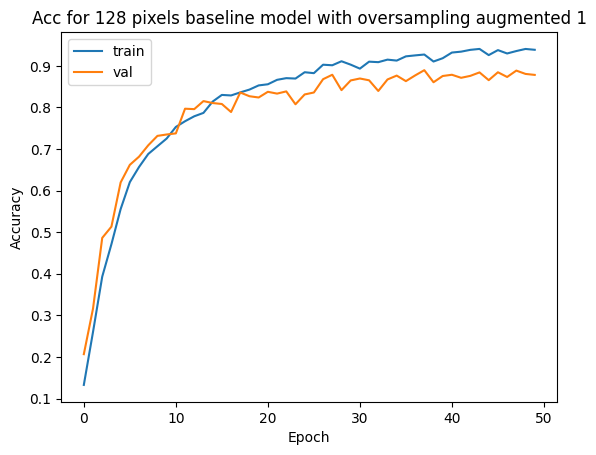

In [ ]:
plot_accuracy(history, 'Acc for 128 pixels baseline model with oversampling augmented 1')

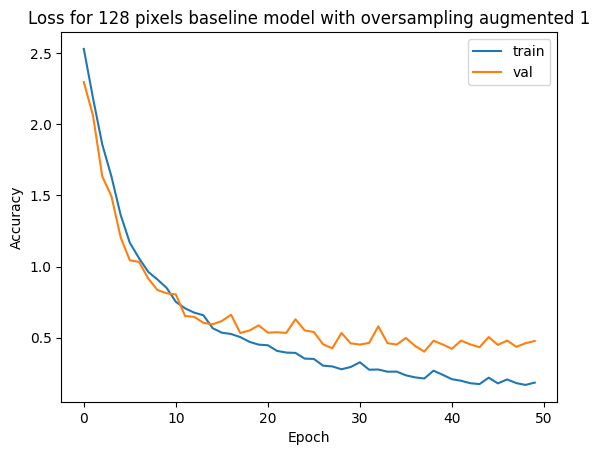

In [ ]:
plot_loss(history, 'Loss for 128 pixels baseline model with oversampling augmented 1')

To my surprise, the oversampled dataset with the mirroring and flipping augmentation on the duplicated images actually seem to improve the accuracy slightly, reaching almost 90% on the test accuracy! I can barely see the overfitting occurring so maybe I will need to research on CNN architecture and see how I can further improve on it. Now, let me try on the 31 pixels model.

In [ ]:
del model_128_augmented_1, history
gc.collect()

12036

In [ ]:
model_31_augmented_1 = baseline_model_31()
history = model_31_augmented_1.fit(train_data_31, train_label_31_encoded, batch_size=128, epochs=50, validation_data=(val_data_31, val_label_31_encoded))
model_31_augmented_1.evaluate(test_data_31, test_label_31_encoded, batch_size=64)

Epoch 1/50
112/112 [==============================] - 2s 9ms/step - loss: 2.5901 - accuracy: 0.1419 - val_loss: 2.3645 - val_accuracy: 0.2653
Epoch 2/50
112/112 [==============================] - 1s 7ms/step - loss: 2.1765 - accuracy: 0.3238 - val_loss: 1.9957 - val_accuracy: 0.3840
Epoch 3/50
112/112 [==============================] - 1s 8ms/step - loss: 1.8570 - accuracy: 0.4209 - val_loss: 1.7098 - val_accuracy: 0.4500
Epoch 4/50
112/112 [==============================] - 1s 8ms/step - loss: 1.6564 - accuracy: 0.4819 - val_loss: 1.5407 - val_accuracy: 0.5220
Epoch 5/50
112/112 [==============================] - 1s 7ms/step - loss: 1.5112 - accuracy: 0.5354 - val_loss: 1.3617 - val_accuracy: 0.5943
Epoch 6/50
112/112 [==============================] - 1s 8ms/step - loss: 1.3540 - accuracy: 0.5828 - val_loss: 1.2233 - val_accuracy: 0.6293
Epoch 7/50
112/112 [==============================] - 1s 8ms/step - loss: 1.2420 - accuracy: 0.6148 - val_loss: 1.1261 - val_accuracy: 0.6507
Epoch 

[0.7263331413269043, 0.8353333473205566]

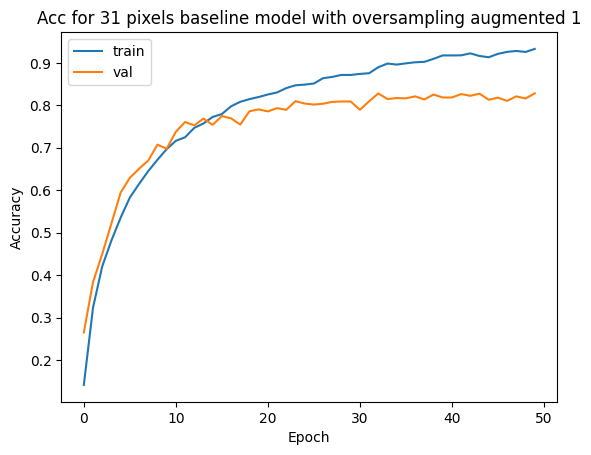

In [ ]:
plot_accuracy(history, 'Acc for 31 pixels baseline model with oversampling augmented 1')

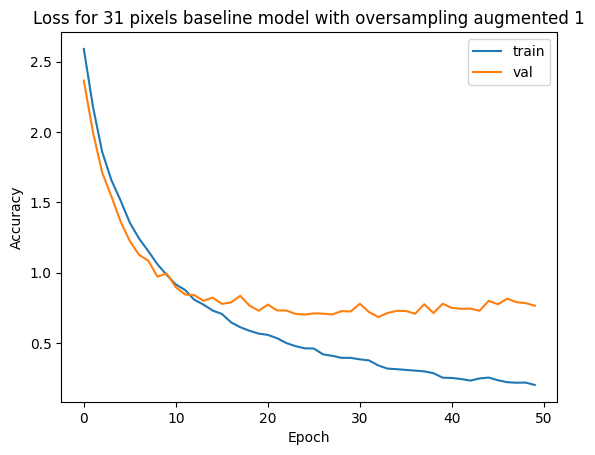

In [ ]:
plot_loss(history, 'Loss for 31 pixels baseline model with oversampling augmented 1')

It feels like this oversampled augmentation did little to no improvement on the 31 pixels model, the overfitting is again quite obvious so either this augmentation doesn't quite work out, or I need a better CNN architecture for this model.

In [ ]:
del model_31_augmented_1, history
gc.collect()

11242

Next, I am also going to attempt to oversample and augment with image mixing and see how it perform. Before that, I am going to demo to see how the image mixing works with an example below.

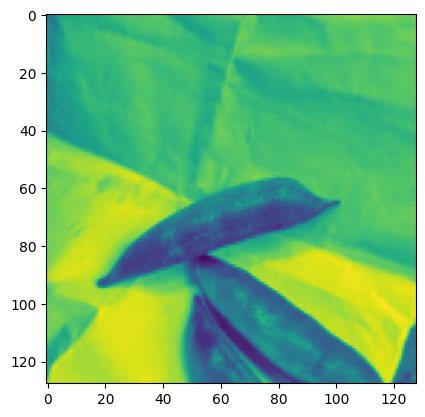

In [ ]:
# firstly, I will get a random first image and perform the transformation
im = Image.open(train_dir + '/Bean/0028.jpg')
transformer = lambda img, inputSize: img.convert('L').resize((inputSize, inputSize))
im = transformer(im, 128)
plt.imshow(im)
plt.show()

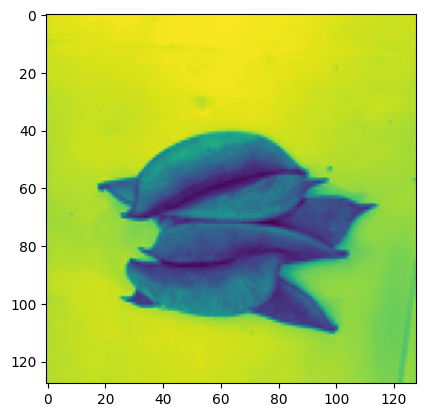

In [ ]:
# then, I will also retrieve the second random image
im2 = Image.open(train_dir + '/Bean/0029.jpg')
im2 = transformer(im2, 128)
plt.imshow(im2)
plt.show()

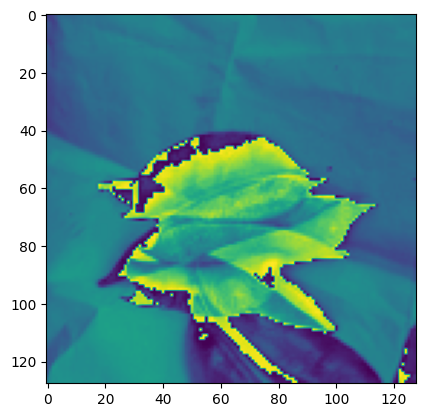

In [ ]:
# then this is the main part, turn them into numpy arrays and then mix them by averaging the pixel values.
array1 = np.array(im)
array2 = np.array(im2)

blended_array = (array1 + array2) / 2
blended_array = blended_array.clip(0, 255).astype("uint8")
blended_image = Image.fromarray(blended_array)

plt.imshow(blended_image)
plt.show()

The final combined image looks weird but let's just try and augment this way on the oversampled images and see how it goes!

In [ ]:
del im, im2, array1, array2, blended_array, blended_image
gc.collect()

In [ ]:
def mix(array1, array2):
    blended_array = (array1 + array2) / 2
    blended_array = blended_array.clip(0, 255).astype("uint8")
    return Image.fromarray(blended_array)

# rebuild the get and transform function such that it will also do the data augmentation on image mixing
def getAndAugment2(directory, inputSize):
    dir_list = os.listdir(directory)
    images = {}
    veg_names = []

    pixelScaler = np.vectorize(lambda x: x / 255)

    for veg_dir in dir_list:
        # a lambda function to perform greyscaling and downsizing on the image
        transformer = lambda img: img.convert('L').resize((inputSize, inputSize))
        # apply the map function to map the image into the transformer and save the whole thing into a dictionary under the veg_dir key
        images[veg_dir] = list(map(transformer, [Image.open(f'{directory}/{veg_dir}/{img_path}') for img_path in os.listdir(f'{directory}/{veg_dir}')]))

        numOfImg = len(images[veg_dir])
        new_img_list = []
        diff = 1
        i = 0
        # for each iteration, mix the ith image with the (i + 1)th image. If it gets an error, it will be due to index out or range error, then set i to 0 again continue mixing ith image but with (i + 2)th image.
        # do until the class has the same number of example as 955, which is the class with the highest samples
        while numOfImg < 955:
            try:
                new_img_list.append(mix(np.array(images[veg_dir][i]), np.array(images[veg_dir][i + diff])))
                i += 1
                numOfImg += 1
            except:
                diff += 1
                i = 0

        images[veg_dir] += new_img_list

    img_list = []
    for veg_name, imgs in images.items():
        for img in imgs:
            img_list.append(pixelScaler(np.asarray(img, dtype=np.float16)))
            veg_names.append(veg_name)

    img_array = np.array(img_list).reshape(len(img_list), inputSize, inputSize, 1)

    return (np.array(veg_names), img_array)

In [ ]:
# to free up memory, I will remove the training data from earlier
del train_label_31, train_data_31, train_label_128, train_data_128, train_label_128_encoded, train_label_31_encoded

train_label_31, train_data_31 = getAndAugment2(train_dir, 31)
train_label_128, train_data_128 = getAndAugment2(train_dir, 128)

train_label_31_encoded = oneHotEncode(train_label_31)
train_label_128_encoded = oneHotEncode(train_label_128)

Now let's try run them on the baseline model again and see how it performs.

In [ ]:
model_128_augmented_2 = baseline_model_128()
history = model_128_augmented_2.fit(train_data_128, train_label_128_encoded, batch_size=128, epochs=50, validation_data=(val_data_128, val_label_128_encoded))
model_128_augmented_2.evaluate(test_data_128, test_label_128_encoded, batch_size=64)

Epoch 1/50
112/112 [==============================] - 7s 46ms/step - loss: 2.5954 - accuracy: 0.1324 - val_loss: 2.5792 - val_accuracy: 0.1870
Epoch 2/50
112/112 [==============================] - 6s 50ms/step - loss: 2.1142 - accuracy: 0.3203 - val_loss: 2.0197 - val_accuracy: 0.3737
Epoch 3/50
112/112 [==============================] - 5s 49ms/step - loss: 1.6960 - accuracy: 0.4522 - val_loss: 1.7142 - val_accuracy: 0.4750
Epoch 4/50
112/112 [==============================] - 5s 44ms/step - loss: 1.4584 - accuracy: 0.5268 - val_loss: 1.9401 - val_accuracy: 0.3703
Epoch 5/50
112/112 [==============================] - 5s 41ms/step - loss: 1.3334 - accuracy: 0.5653 - val_loss: 1.3921 - val_accuracy: 0.5610
Epoch 6/50
112/112 [==============================] - 5s 44ms/step - loss: 1.2104 - accuracy: 0.6054 - val_loss: 1.3334 - val_accuracy: 0.5567
Epoch 7/50
112/112 [==============================] - 5s 42ms/step - loss: 1.1230 - accuracy: 0.6357 - val_loss: 1.1890 - val_accuracy: 0.6167

[0.58939129114151, 0.8199999928474426]

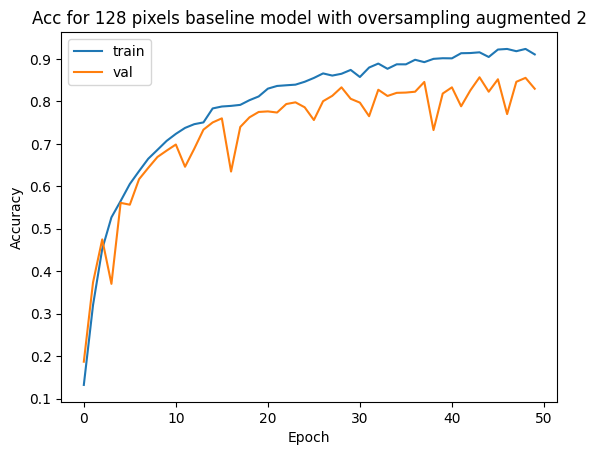

In [ ]:
plot_accuracy(history, 'Acc for 128 pixels baseline model with oversampling augmented 2')

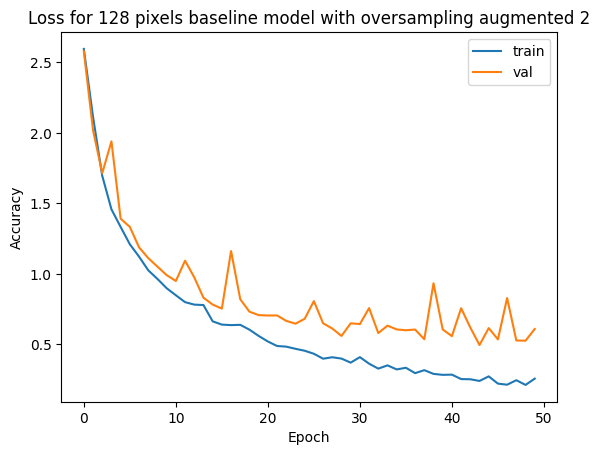

In [ ]:
plot_loss(history, 'Loss for 128 pixels baseline model with oversampling augmented 2')

This oversampling and augmentation method seems to fare worse than the previous one. The accuracy and loss fluctuates a lot

In [ ]:
del model_128_augmented_2, history
gc.collect()

11454

In [ ]:
model_31_augmented_2 = baseline_model_31()
history = model_31_augmented_2.fit(train_data_31, train_label_31_encoded, batch_size=128, epochs=50, validation_data=(val_data_31, val_label_31_encoded))
model_31_augmented_2.evaluate(test_data_31, test_label_31_encoded, batch_size=64)

Epoch 1/50
112/112 [==============================] - 2s 10ms/step - loss: 2.5226 - accuracy: 0.1873 - val_loss: 2.4688 - val_accuracy: 0.2333
Epoch 2/50
112/112 [==============================] - 1s 7ms/step - loss: 2.1645 - accuracy: 0.3419 - val_loss: 2.1158 - val_accuracy: 0.3507
Epoch 3/50
112/112 [==============================] - 1s 8ms/step - loss: 1.9104 - accuracy: 0.4110 - val_loss: 1.9971 - val_accuracy: 0.3877
Epoch 4/50
112/112 [==============================] - 1s 7ms/step - loss: 1.7098 - accuracy: 0.4714 - val_loss: 1.7524 - val_accuracy: 0.4653
Epoch 5/50
112/112 [==============================] - 1s 7ms/step - loss: 1.5663 - accuracy: 0.5153 - val_loss: 1.5987 - val_accuracy: 0.5200
Epoch 6/50
112/112 [==============================] - 1s 8ms/step - loss: 1.4547 - accuracy: 0.5494 - val_loss: 1.5129 - val_accuracy: 0.5523
Epoch 7/50
112/112 [==============================] - 1s 6ms/step - loss: 1.3396 - accuracy: 0.5882 - val_loss: 1.3752 - val_accuracy: 0.5853
Epoch

[0.8781909942626953, 0.7873333096504211]

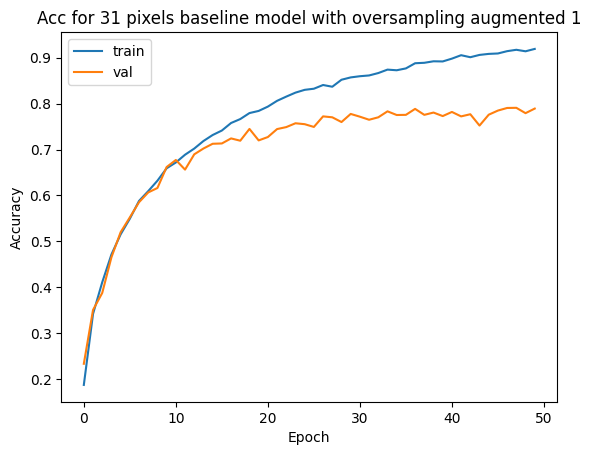

In [ ]:
plot_accuracy(history, 'Acc for 31 pixels baseline model with oversampling augmented 1')

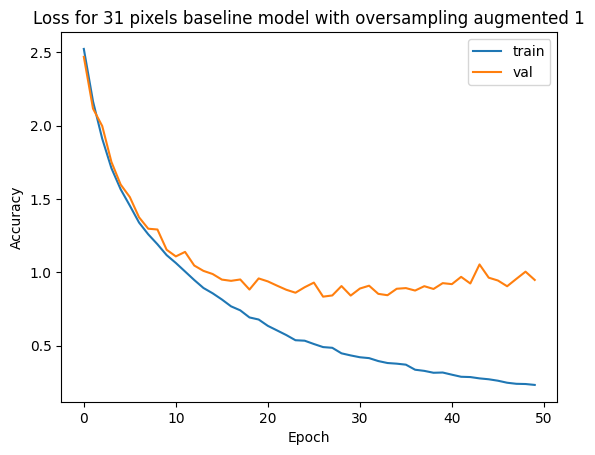

In [ ]:
plot_loss(history, 'Loss for 31 pixels baseline model with oversampling augmented 1')

In [ ]:
del model_31_augmented_2, history
gc.collect()

11906

Unfortunately, oversampling and perform image mixing on those oversampled images did not do any better than not performing any oversampling at all, especially for this 31 pixel baseline model. So I think oversampling and then flipping and mirroring just works better overall based on this results.

## CNN Architecture improvement

My next clear step would be to improve the CNN architecture to improve the accuracy and reduce overfitting. My baseline models had been built randomly and with trial and errors, and without any research on how to properly build one. So now I am going to find out how to build one by looking researching on how CNN architectures are being designed.

In [2]:
from keras.layers import Dense, BatchNormalization, MaxPooling2D, Conv2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam

In [8]:
# I want to further "isolate" this section from the rest to save some memory space, I'll reinitiate some variables just for this particular section of the code
train_label_31, train_data_31 = getAndAugment1(train_dir, 31)
test_label_31, test_data_31 = getAndTransform(test_dir, 31)
val_label_31, val_data_31 = getAndTransform(val_dir, 31)
train_label_128, train_data_128 = getAndAugment1(train_dir, 128)
test_label_128, test_data_128 = getAndTransform(test_dir, 128)
val_label_128, val_data_128 = getAndTransform(val_dir, 128)

train_label_128_encoded = oneHotEncode(train_label_128)
test_label_128_encoded = oneHotEncode(test_label_128)
val_label_128_encoded = oneHotEncode(val_label_128)
train_label_31_encoded = oneHotEncode(train_label_31)
test_label_31_encoded = oneHotEncode(test_label_31)
val_label_31_encoded = oneHotEncode(val_label_31)

del train_label_128, test_label_128, val_label_128, train_label_31, test_label_31, val_label_31
gc.collect()

0

The problem that I have been facing is overfitting. I have already reduce the overfitting a bit with the oversampling and augmenting the oversampled images with flipping and mirroring, but there are still room for improvement as the training and validation accuracy still diverge. This could be because I do not have the right regularisation, or maybe I didn't use the dropout layers properly, or maybe the model is a little too complex.

After some researching and some trial and error, these are the following observations:
1. There is an optimal value of dropout rate I can set. Too high, the model will have trouble learning, and too low, it will not resolve the overfitting problem. Also, I have to ensure the frontal layers of the architecture has smaller dropout rate than the back layers (Ruizendaal, R. (2021)).
2. Add more fully connected layers at the end. This is because those layers will be responsible for picking up higher level features.
3. I tried batch normalisation, but for some reason, it resulted in fluctuating validation accuracy and loss curves, so it did not help at all.

In [3]:
def updated_model_128():
    model = Sequential()

    model.add(Conv2D(25, kernel_size=5, input_shape=(128, 128, 1), activation='relu', strides=2))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.35))
    model.add(Conv2D(50, kernel_size=5, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.4))
    model.add(Conv2D(100, kernel_size=4, activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))

    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    return model

In [10]:
test_model_128 = updated_model_128()
test_model_128.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 25)        650       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 25)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 25)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 50)        31300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 50)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 50)        0

In [11]:
history_128 = test_model_128.fit(train_data_128, train_label_128_encoded, batch_size=128, epochs=30, validation_data=(val_data_128, val_label_128_encoded))
test_model_128.evaluate(test_data_128, test_label_128_encoded, batch_size=64)

Epoch 1/30
176/176 [==============================] - 18s 27ms/step - loss: 2.5500 - accuracy: 0.1184 - val_loss: 2.3801 - val_accuracy: 0.1567
Epoch 2/30
176/176 [==============================] - 4s 22ms/step - loss: 2.1627 - accuracy: 0.2436 - val_loss: 1.7704 - val_accuracy: 0.4050
Epoch 3/30
176/176 [==============================] - 4s 24ms/step - loss: 1.6575 - accuracy: 0.4386 - val_loss: 1.3767 - val_accuracy: 0.5320
Epoch 4/30
176/176 [==============================] - 4s 23ms/step - loss: 1.3027 - accuracy: 0.5637 - val_loss: 0.9258 - val_accuracy: 0.6953
Epoch 5/30
176/176 [==============================] - 4s 21ms/step - loss: 1.0091 - accuracy: 0.6637 - val_loss: 0.8957 - val_accuracy: 0.6967
Epoch 6/30
176/176 [==============================] - 4s 22ms/step - loss: 0.8156 - accuracy: 0.7277 - val_loss: 0.6420 - val_accuracy: 0.7927
Epoch 7/30
176/176 [==============================] - 4s 25ms/step - loss: 0.7081 - accuracy: 0.7668 - val_loss: 0.4766 - val_accuracy: 0.845

[0.21562357246875763, 0.9419999718666077]

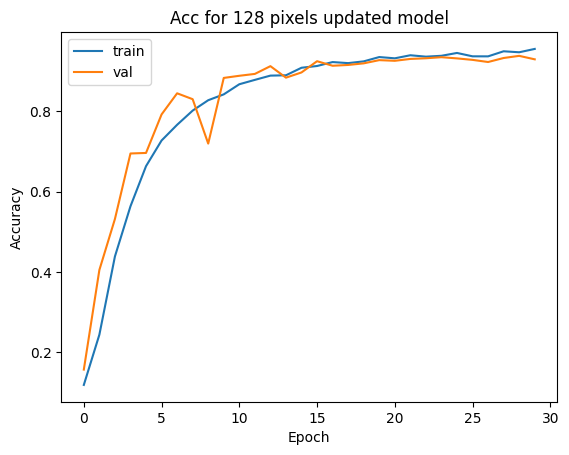

In [12]:
plot_accuracy(history_128, 'Acc for 128 pixels updated model')

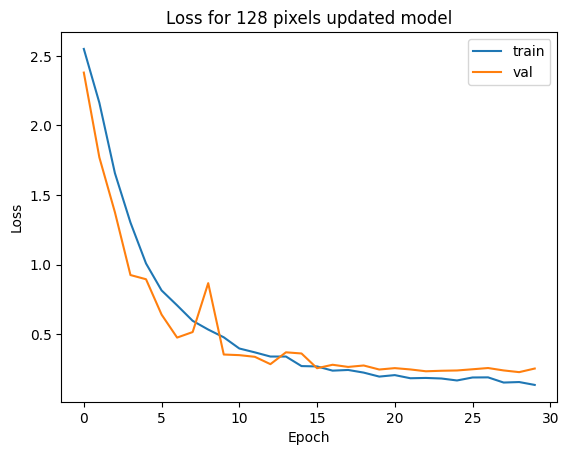

In [13]:
plot_loss(history_128, 'Loss for 128 pixels updated model')

With this new architecture, not only did it took lesser epochs, but also attaining a higher accuracy than before, at 94% accuracy on the test dataset.

In [4]:
def updated_model_31():
    model = Sequential()

    model.add(Conv2D(40, kernel_size=3, input_shape=(31, 31, 1), activation='relu', strides=2, padding='same'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.35))
    model.add(Conv2D(80, kernel_size=3, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(15, activation='softmax'))

    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    return model

In [18]:
test_model_31 = updated_model_31()
test_model_31.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 16, 16, 40)        400       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 40)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 40)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 80)          28880     
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 80)          0         
                                                                 
 flatten_1 (Flatten)         (None, 2880)              0         
                                                      

In [19]:
history_31 = test_model_31.fit(train_data_31, train_label_31_encoded, batch_size=128, epochs=60, validation_data=(val_data_31, val_label_31_encoded))
test_model_31.evaluate(test_data_31, test_label_31_encoded, batch_size=64)

Epoch 1/60
176/176 [==============================] - 3s 8ms/step - loss: 2.5380 - accuracy: 0.1481 - val_loss: 2.2214 - val_accuracy: 0.2537
Epoch 2/60
176/176 [==============================] - 1s 6ms/step - loss: 1.9945 - accuracy: 0.3418 - val_loss: 1.6228 - val_accuracy: 0.4583
Epoch 3/60
176/176 [==============================] - 1s 6ms/step - loss: 1.6223 - accuracy: 0.4662 - val_loss: 1.3891 - val_accuracy: 0.5497
Epoch 4/60
176/176 [==============================] - 1s 6ms/step - loss: 1.3998 - accuracy: 0.5445 - val_loss: 1.0987 - val_accuracy: 0.6437
Epoch 5/60
176/176 [==============================] - 1s 6ms/step - loss: 1.2242 - accuracy: 0.6036 - val_loss: 0.9636 - val_accuracy: 0.6943
Epoch 6/60
176/176 [==============================] - 1s 6ms/step - loss: 1.0990 - accuracy: 0.6450 - val_loss: 0.8633 - val_accuracy: 0.7183
Epoch 7/60
176/176 [==============================] - 1s 6ms/step - loss: 0.9808 - accuracy: 0.6813 - val_loss: 0.7465 - val_accuracy: 0.7690
Epoch 

[0.27994784712791443, 0.9243333339691162]

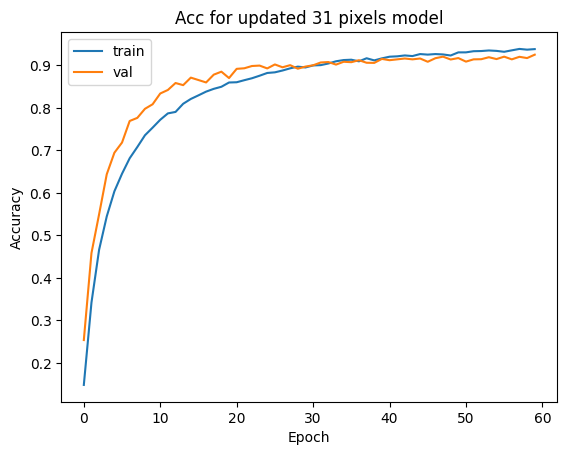

In [20]:
plot_accuracy(history_31, 'Acc for updated 31 pixels model')

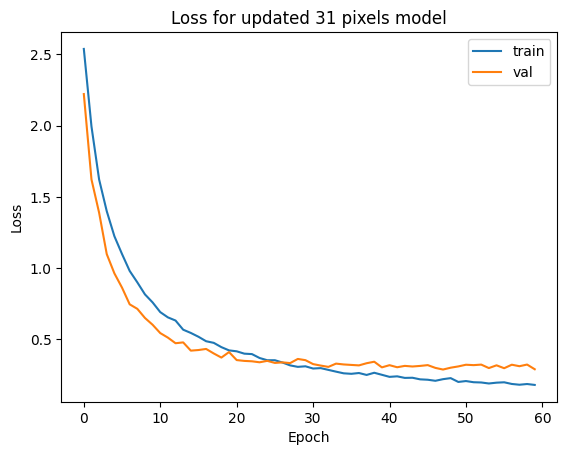

In [21]:
plot_loss(history_31, 'Loss for updated 31 pixels model')

By tweaking the architectures further more, it help boost the accuracies a little bit. Both the 31 pixels and the 128 pixels models are over 90% accuracy. This is an improvement over the baseline model where the 128 pixel model almost reaches 90% when trained with the oversampled with the mirroring and flipping augmentation and now it reaches around 94%, while the 31 pixel model that was previously stuck at 80% has now reach 92% accuracy.

Before I move on to the last stage, I want to save the weight so that I can use it for prediction where I don't have to retrain the models to save on memory and time.

In [14]:
test_model_128.save_weights('model_128_weights.h5')
del test_model_128, history_128
gc.collect()

8703

In [22]:
test_model_31.save_weights('model_31_weights.h5')
del test_model_31, history_31
gc.collect()

7864

## Model prediction

Now I am done with all the model training, the final stage is to attempt to predict a vegetable that the model has probably never seen before. Those photos are downloaded from a copyright-free website so I hope it'll be fine. I will try out if the models are able to predict a broccoli, carrot, and a pumpkin.

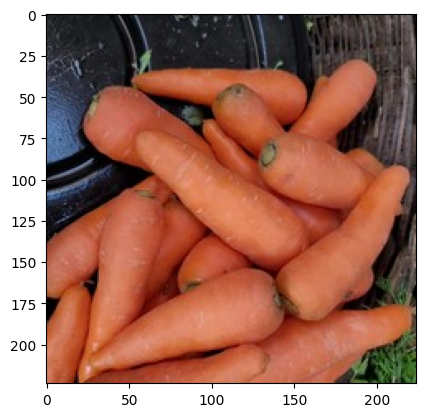

In [91]:
sample_img_1 = Image.open(f'{test_dir}/Carrot/1003.jpg')
plt.imshow(sample_img_1)
plt.show()

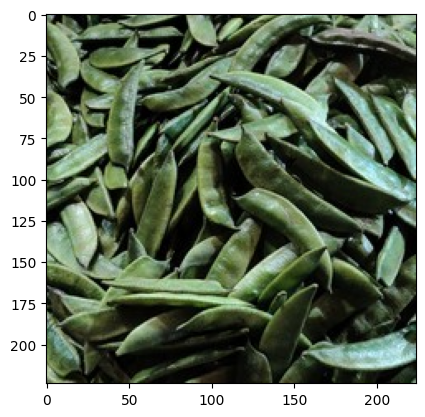

In [92]:
sample_img_2 = Image.open(f'{test_dir}/Bean/0013.jpg')
plt.imshow(sample_img_2)
plt.show()

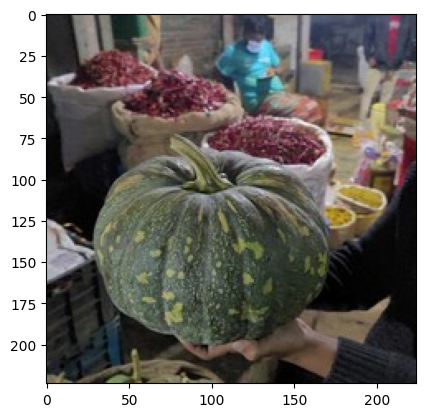

In [93]:
sample_img_3 = Image.open(f'{test_dir}/Pumpkin/1009.jpg')
plt.imshow(sample_img_3)
plt.show()

Transform them into appropriately so it can be fed into the models.

In [94]:
pixelScaler = np.vectorize(lambda x: x / 255)
transformer = lambda img, inputSize: pixelScaler(np.array(img.convert('L').resize((inputSize, inputSize)))).reshape(1, inputSize, inputSize, 1)
array_img_1_31 = transformer(sample_img_1, 31)
array_img_1_128 = transformer(sample_img_1, 128)
array_img_2_31 = transformer(sample_img_2, 31)
array_img_2_128 = transformer(sample_img_2, 128)
array_img_3_31 = transformer(sample_img_3, 31)
array_img_3_128 = transformer(sample_img_3, 128)

Instantiate the models and load the weights.

In [64]:
model_128 = updated_model_128()
model_128.load_weights('model_128_weights.h5')
model_31 = updated_model_31()
model_31.load_weights('model_31_weights.h5')

In [77]:
labels = sorted(os.listdir(train_dir))

Prediction with 128 pixels model: Carrot
Prediction with 31 pixels model: Carrot


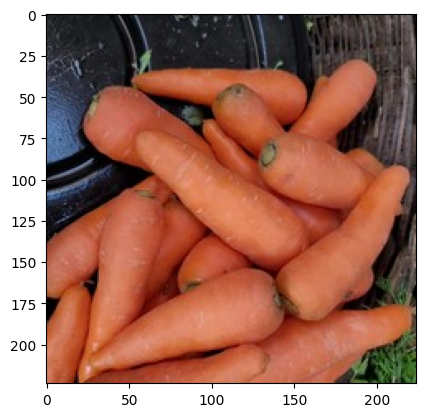

In [100]:
# first off, a carrot
print(f'Prediction with 128 pixels model: {labels[np.argmax(model_128.predict(array_img_1_128, verbose=0))]}')
print(f'Prediction with 31 pixels model: {labels[np.argmax(model_31.predict(array_img_1_31, verbose=0))]}')
plt.imshow(sample_img_1)
plt.show()

Prediction with 128 pixels model: Bean
Prediction with 31 pixels model: Bean


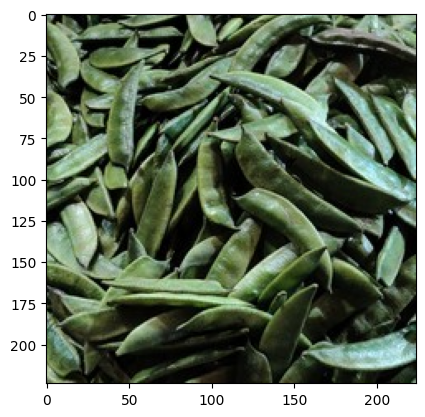

In [101]:
# next, the beans
print(f'Prediction with 128 pixels model: {labels[np.argmax(model_128.predict(array_img_2_128, verbose=0))]}')
print(f'Prediction with 31 pixels model: {labels[np.argmax(model_31.predict(array_img_2_31, verbose=0))]}')
plt.imshow(sample_img_2)
plt.show()

Prediction with 128 pixels model: Pumpkin
Prediction with 31 pixels model: Pumpkin


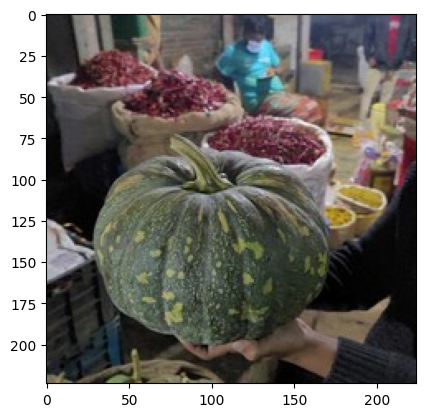

In [102]:
# lastly, the pumpkin
print(f'Prediction with 128 pixels model: {labels[np.argmax(model_128.predict(array_img_3_128, verbose=0))]}')
print(f'Prediction with 31 pixels model: {labels[np.argmax(model_31.predict(array_img_3_31, verbose=0))]}')
plt.imshow(sample_img_3)
plt.show()

Our models are able to predict at least 3 different vegetable types! Those images were from the test directory, so, in theory, the model has never seen those images before.